<a href="https://colab.research.google.com/github/jungsuryu/study-miscellaneous/blob/main/fbprophet_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 주식 데이터 fbprophet으로 분석하기


### 네이버
- https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=2

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url = "https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=2"
req = Request(url, headers={"User-Agent": "Chrome"})
page = urlopen(req).read()
page

b'<!DOCTYPE html><html data-color-theme="light" id="atomic" class="NoJs desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charSet="utf-8"/><title>NAVER Corporation (035420.KS) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="035420.KS, NAVER Corporation, 035420.KS historical prices, NAVER Corporation historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for 035420.KS stock on Yahoo Finance. View daily, weekly or monthly format back to when NAVER Corporation stock was issued."/><meta na

In [ ]:
soup = BeautifulSoup(page, "html.parser")
table = soup.find("table")
table.text

'DateOpenHighLowClose*Adj Close**VolumeJul 27, 2022247,500.00247,500.00241,000.00246,000.00246,000.00484,063Jul 26, 2022244,500.00245,000.00240,500.00245,000.00245,000.00432,397Jul 25, 2022248,000.00249,000.00244,000.00248,000.00248,000.00380,368Jul 22, 2022250,000.00253,500.00247,000.00250,000.00250,000.00465,586Jul 21, 2022248,500.00256,500.00246,500.00250,500.00250,500.00567,875Jul 20, 2022251,000.00253,500.00244,500.00246,000.00246,000.00635,582Jul 19, 2022242,500.00244,000.00240,000.00243,500.00243,500.00350,932Jul 18, 2022234,000.00247,000.00233,000.00246,500.00246,500.00986,963Jul 15, 2022234,500.00234,500.00228,000.00231,000.00231,000.00826,920Jul 14, 2022232,000.00236,000.00231,000.00233,500.00233,500.00611,226Jul 13, 2022232,000.00239,000.00232,000.00237,500.00237,500.00451,619Jul 12, 2022236,500.00237,500.00230,500.00233,500.00233,500.00601,679Jul 11, 2022246,000.00248,000.00238,500.00240,500.00240,500.00554,603Jul 08, 2022247,000.00252,500.00246,000.00249,000.00249,000.0065

In [ ]:
import pandas as pd
df_raw = pd.read_html(str(table))[0]
df_raw.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jul 27, 2022",247500.00,247500.00,241000.00,246000.00,246000.00,484063
1,"Jul 26, 2022",244500.00,245000.00,240500.00,245000.00,245000.00,432397
2,"Jul 25, 2022",248000.00,249000.00,244000.00,248000.00,248000.00,380368
3,"Jul 22, 2022",250000.00,253500.00,247000.00,250000.00,250000.00,465586
4,"Jul 21, 2022",248500.00,256500.00,246500.00,250500.00,250500.00,567875


In [ ]:
# fbprophet을 사용하는 형식에 맞춰준 뒤, 맨 마지막 Null값 정리
df_tmp = pd.DataFrame({"ds": df_raw["Date"], "y": df_raw["Close*"]})
df_tmp

,ds,y
0,"Jul 27, 2022",246000.00
1,"Jul 26, 2022",245000.00
2,"Jul 25, 2022",248000.00
3,"Jul 22, 2022",250000.00
4,"Jul 21, 2022",250500.00
...,...,...
96,"Mar 08, 2022",304500.00
97,"Mar 07, 2022",307000.00
98,"Mar 04, 2022",325500.00
99,"Mar 03, 2022",325500.00


In [ ]:
df_target = df_tmp[:-1]
df_target

,ds,y
0,"Jul 27, 2022",246000.00
1,"Jul 26, 2022",245000.00
2,"Jul 25, 2022",248000.00
3,"Jul 22, 2022",250000.00
4,"Jul 21, 2022",250500.00
...,...,...
95,"Mar 10, 2022",304500.00
96,"Mar 08, 2022",304500.00
97,"Mar 07, 2022",307000.00
98,"Mar 04, 2022",325500.00


In [ ]:
# hardcopy 후, 날짜 형태 바꿔주기
df = df_target.copy()
df["ds"] = pd.to_datetime(df_target["ds"], format="%b %d, %Y")
df.head()

,ds,y
0,2022-07-27,246000.00
1,2022-07-26,245000.00
2,2022-07-25,248000.00
3,2022-07-22,250000.00
4,2022-07-21,250500.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [ ]:
# 데이터형 변환 object => float
df["y"] = df["y"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [ ]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
125,2022-08-22,227058.304344,217231.521888,235881.144403
126,2022-08-23,224300.466643,214973.207787,233738.939934
127,2022-08-24,220710.268038,211391.466488,229558.919944
128,2022-08-25,216421.195348,207313.418221,225860.703175
129,2022-08-26,214354.928132,204203.736950,222970.579574


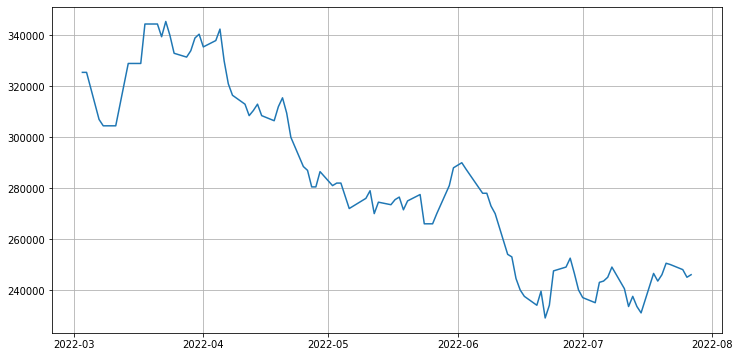

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.show()

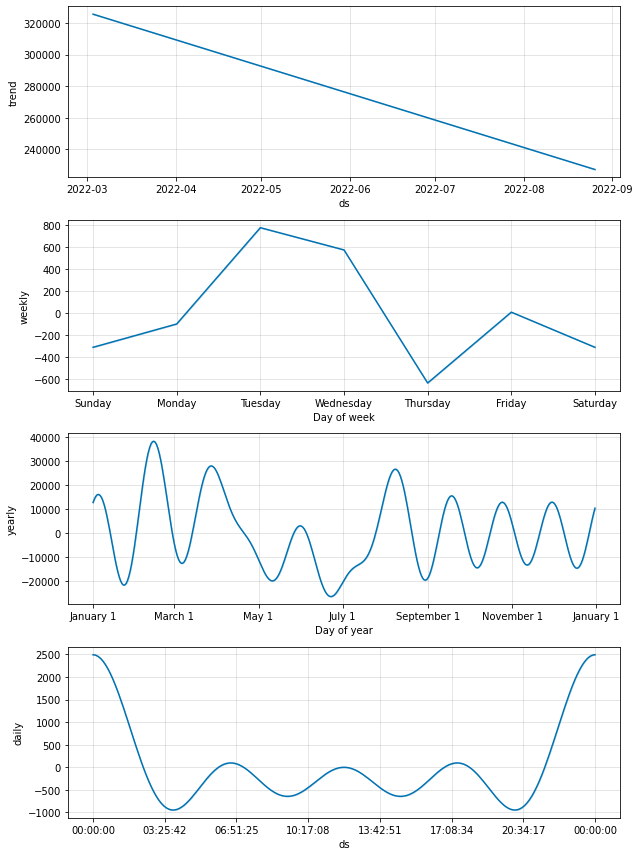

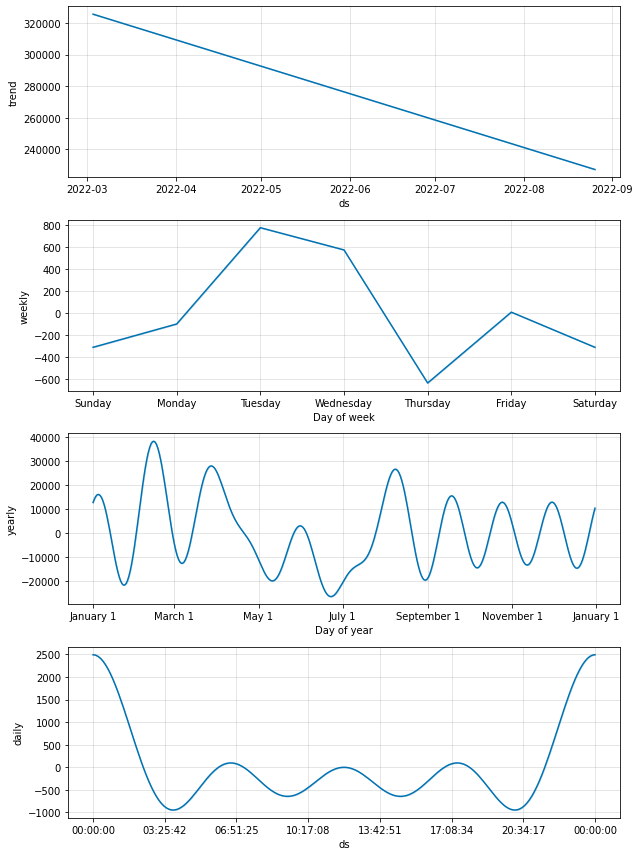

In [ ]:
m.plot_components(forecast)

### KIA

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 기아 자동차의 종목코드를 가지고 기간을 입력
import yfinance as yf
from pandas_datareader import data

yf.pdr_override()

start_date = "2010-03-01"
end_date = "2018-02-28"
KIA = data.get_data_yahoo("000270.KS", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
KIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17168.687500,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,17600.849609,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,17679.421875,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,17875.859375,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,17915.154297,4326618


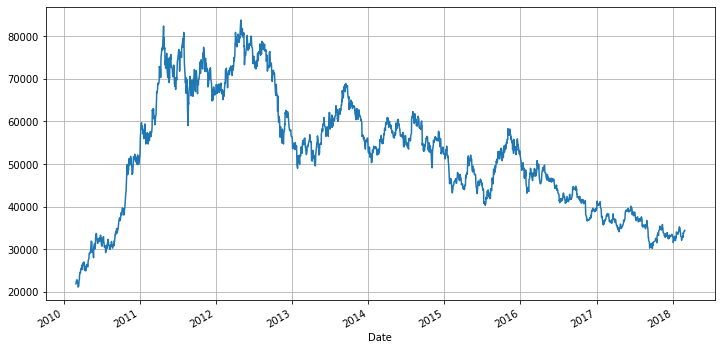

In [ ]:
KIA["Close"].plot(figsize=(12, 6), grid=True)

In [ ]:
# accuracy 확인을 위한 데이터
KIA_trunc = KIA[:"2017-11-30"]
KIA_trunc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17168.687500,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,17600.849609,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,17679.421875,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,17875.859375,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,17915.154297,4326618


In [ ]:
# forecast를 위한 준비
df = pd.DataFrame({"ds": KIA_trunc.index, "y": KIA_trunc["Close"]})
df.reset_index(inplace=True)
del df["Date"]
df.head()

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
2003,2018-02-24,26985.457856,22881.205821,30981.115222
2004,2018-02-25,27068.810794,22798.294274,31190.784933
2005,2018-02-26,27299.308107,23071.200746,31325.619948
2006,2018-02-27,27464.139565,22872.276609,31579.444287
2007,2018-02-28,27509.941351,23059.545520,31691.114017


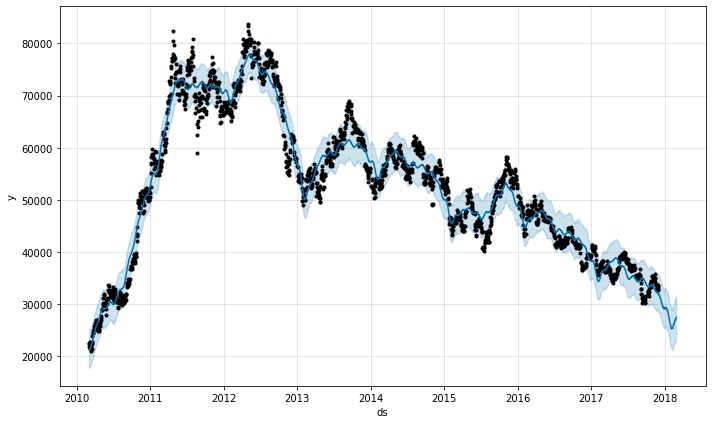

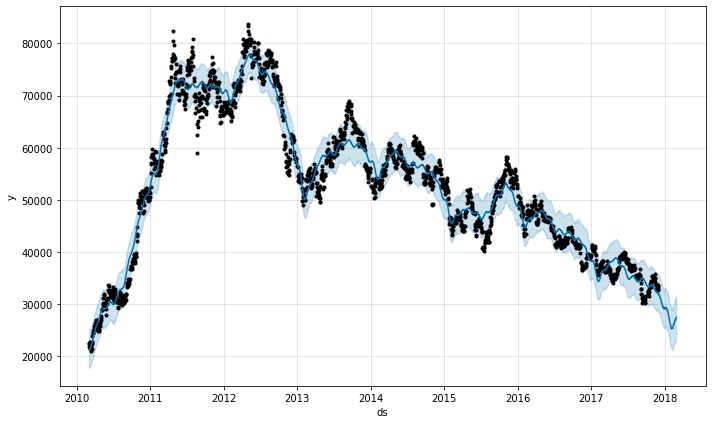

In [ ]:
m.plot(forecast)

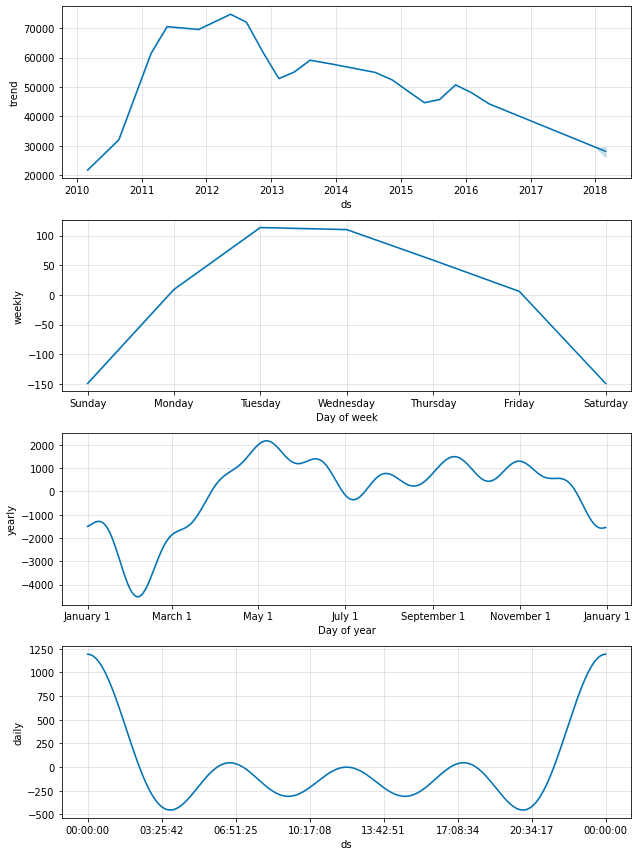

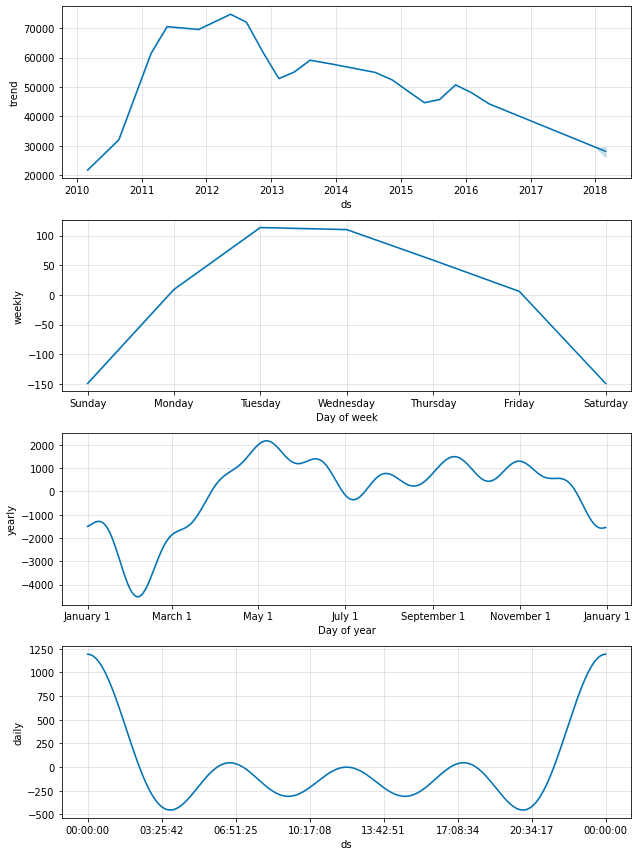

In [ ]:
m.plot_components(forecast)

In [ ]:
KIA["Close"]

Date
2010-03-02    21850.0
2010-03-03    22400.0
2010-03-04    22500.0
2010-03-05    22750.0
2010-03-08    22800.0
               ...   
2018-02-22    33650.0
2018-02-23    34000.0
2018-02-26    34200.0
2018-02-27    34450.0
2018-02-28    34350.0
Name: Close, Length: 1976, dtype: float64

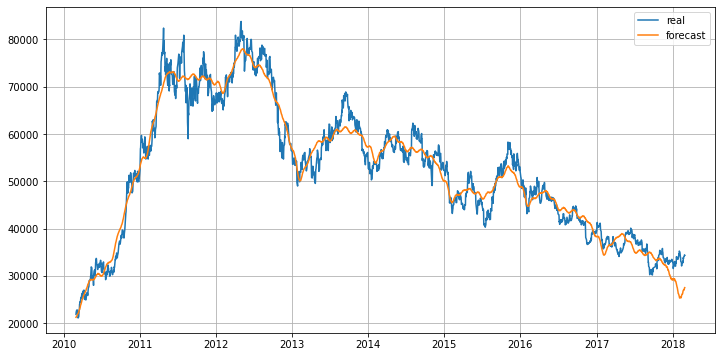

In [ ]:
plt.figure(figsize=(12 ,6))
plt.plot(KIA.index, KIA["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

### 대한항공

In [ ]:
# 003490 대한항공

start_date = "2010-03-01"
end_date = "2018-02-28"
KoreaAir = data.get_data_yahoo("003490.KS", start_date, end_date)
KoreaAir.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-22,35050.0,35450.0,34800.0,35000.0,34819.800781,260174
2018-02-23,35200.0,35400.0,34550.0,35150.0,34969.027344,321125
2018-02-26,35300.0,35550.0,33600.0,33900.0,33725.460938,932870
2018-02-27,33900.0,34300.0,33650.0,33900.0,33725.460938,527398
2018-02-28,33650.0,33750.0,32650.0,32650.0,32481.898438,830726


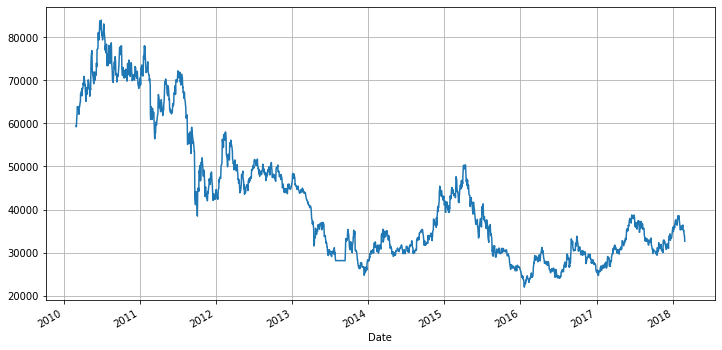

In [ ]:
KoreaAir["Close"].plot(figsize=(12, 6), grid=True)

In [ ]:
# accuracy 확인 위한 데이터 분리
KoreaAir_trunc = KoreaAir[:"2017-11-30"]
KoreaAir_trunc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-24,32900.0,33250.0,32300.0,32500.0,32168.935547,530941
2017-11-27,32600.0,32800.0,31800.0,31850.0,31525.556641,472095
2017-11-28,32050.0,32500.0,31550.0,31600.0,31278.103516,708754
2017-11-29,31850.0,32250.0,31050.0,31300.0,30981.160156,850385
2017-11-30,31800.0,32050.0,31350.0,31350.0,31030.650391,682573


In [ ]:
# forecast를 위한 준비
df = pd.DataFrame({"ds": KoreaAir_trunc.index, "y": KoreaAir_trunc["Close"]})
df.reset_index(inplace=True)
del df["Date"]
df.head()

,ds,y
0,2010-03-02,59390.417969
1,2010-03-03,59190.785156
2,2010-03-04,59290.601562
3,2010-03-05,60588.207031
4,2010-03-08,62784.152344


In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
2003,2018-02-24,34820.670547,30576.665686,39151.553744
2004,2018-02-25,34728.368560,30528.021570,38824.470559
2005,2018-02-26,35655.309811,30977.741002,39545.954736
2006,2018-02-27,35502.030445,30950.533843,39658.196841
2007,2018-02-28,35425.916372,31146.276278,39784.397940


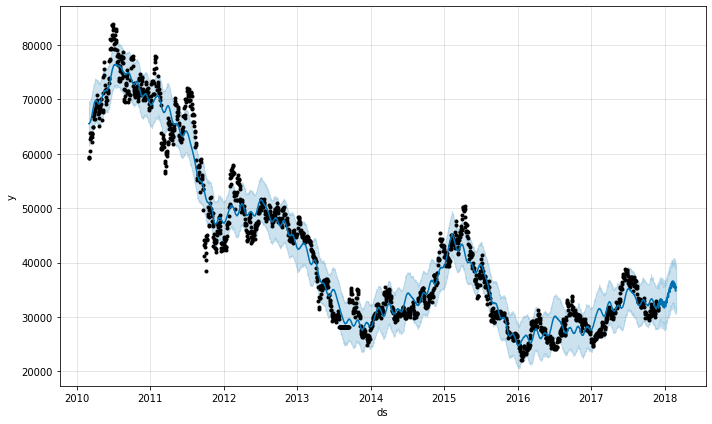

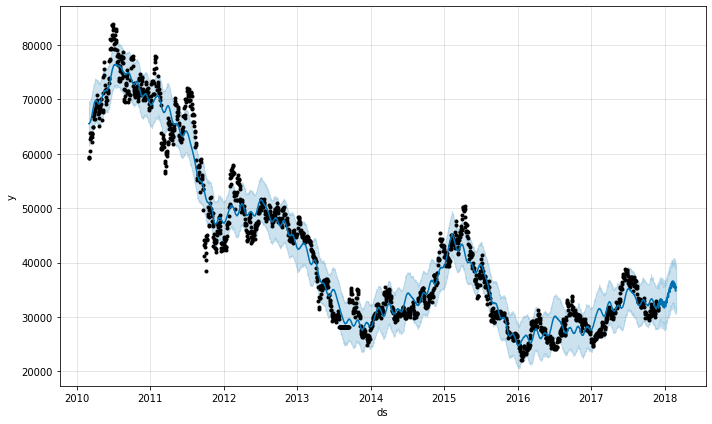

In [ ]:
m.plot(forecast)

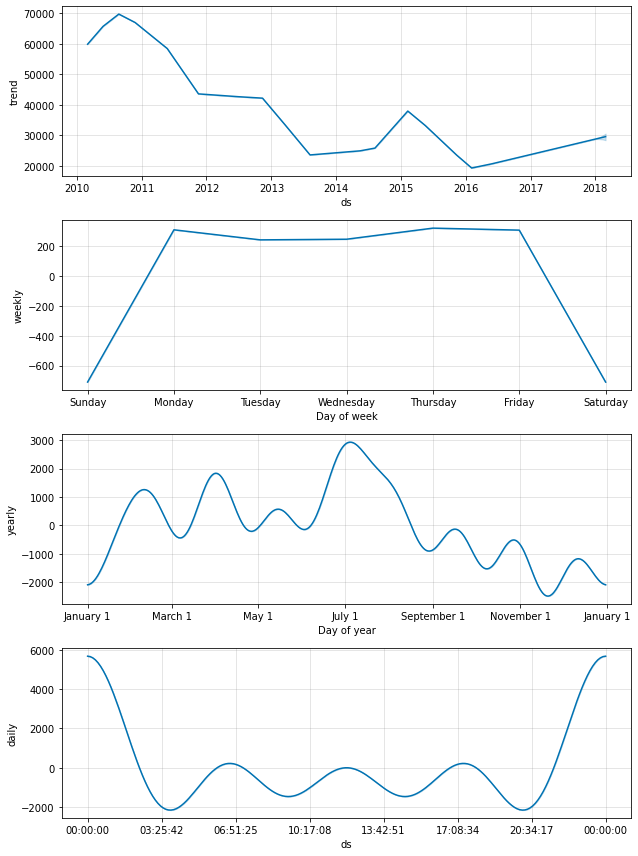

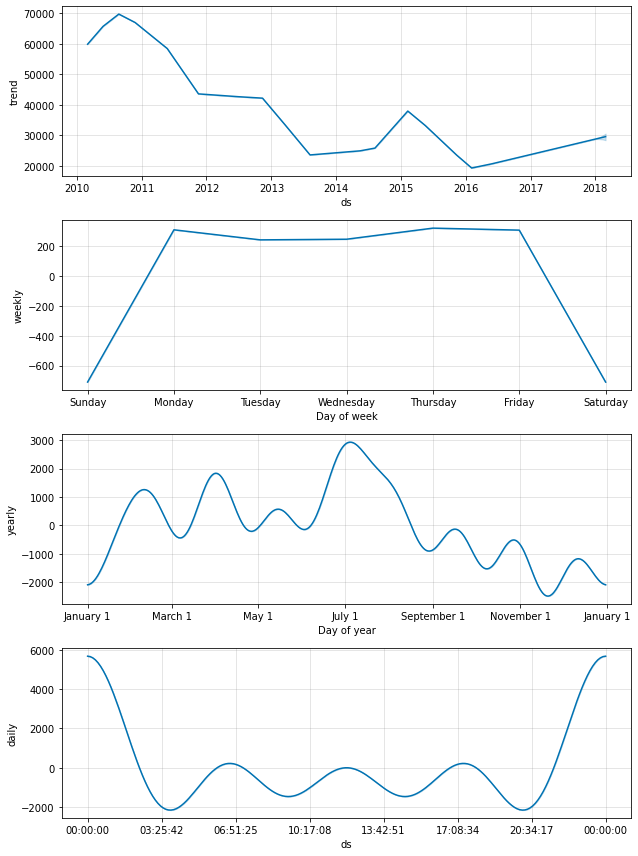

In [ ]:
m.plot_components(forecast)

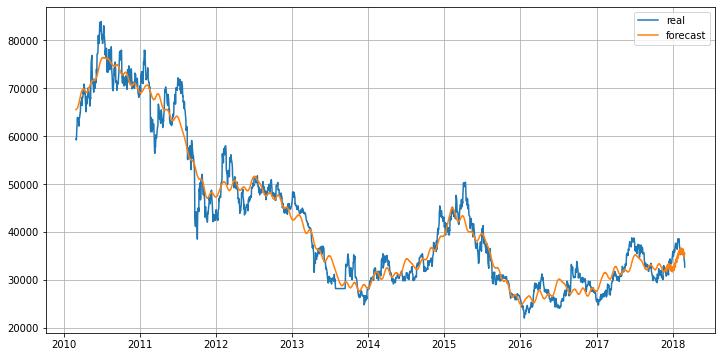

In [ ]:
# 실제와 예측값 비교 그래프
plt.figure(figsize=(12, 6))
plt.plot(KoreaAir.index, KoreaAir["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

### 조금 특이한 형태의 데이터에 대한 forecast
- logistic 성장형 그래프를 가진 데이터에 대한 forecast

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


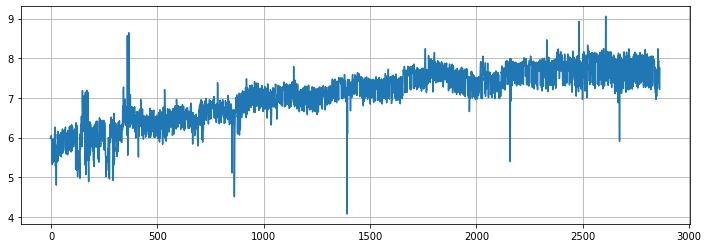

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/05_example_wp_R2.csv", index_col=0)
df["y"].plot(figsize=(12, 4), grid=True)

In [ ]:
df["cap"] = 8.5
df.tail()

,ds,y,cap
2858,2015-12-11,7.834788,8.5
2859,2015-12-12,7.360104,8.5
2860,2015-12-13,7.479864,8.5
2861,2015-12-18,7.765145,8.5
2862,2015-12-19,7.220374,8.5


In [ ]:
m = Prophet(growth="logistic", daily_seasonality=True)
m.fit(df)

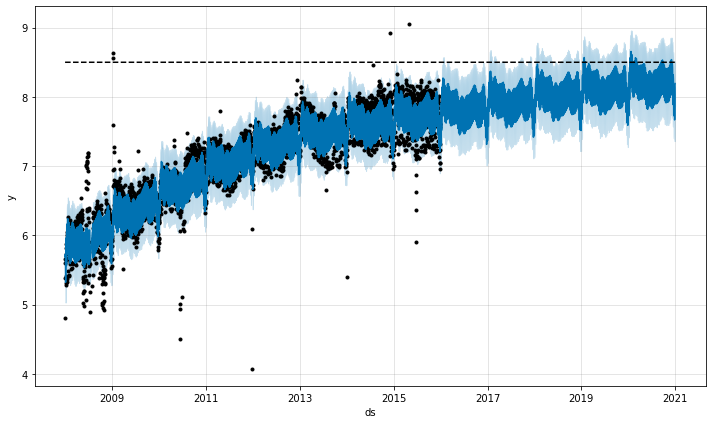

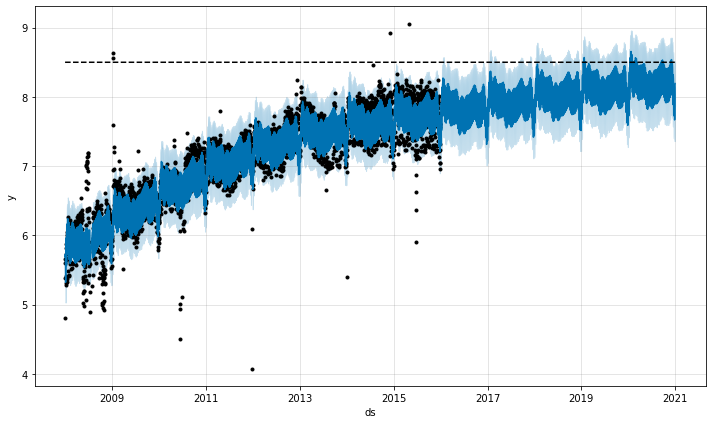

In [ ]:
future = m.make_future_dataframe(periods=1826)
future["cap"] = 8.5
forecast = m.predict(future)
m.plot(forecast)